#### In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: 

[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df=pd.read_csv('Topic_Survey_Assignment.csv',index_col=0)

In [4]:
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [6]:
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [27]:
df2=(100. * (df / 2233)).round(2)
df2

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


### Bar Chart

In [28]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

In [29]:
df2

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


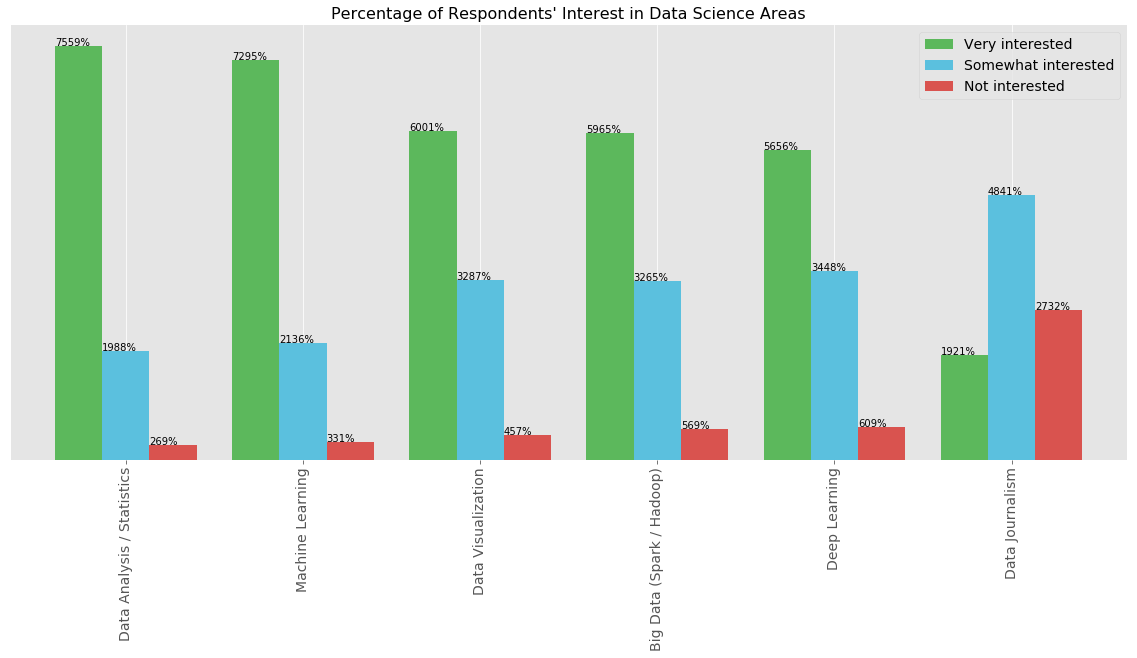

In [41]:
ax=df2.plot(kind='bar', figsize=(20, 8), rot=90, width=0.8, color=('#5cb85c','#5bc0de','#d9534f'), 
            fontsize=14, edgecolor=None) # rotate the bars by 90 degrees

# plt.xlabel('Year')
# plt.ylabel('Number of Immigrants')
plt.title('Percentage of Respondents\' Interest in Data Science Areas', fontsize=16)
plt.legend(fontsize=14)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
# Annotate arrow
# plt.annotate('',                      # s: str. Will leave it blank for no text
#              xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
#              xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
#              xycoords='data',         # will use the coordinate system of the object being annotated 
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)      )

plt.show()